In [1]:
#Importing things
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
df03 = pd.read_csv('./Resources/03_tech_job_listing_data.csv')
df03.head(50)

,Keyword,LinkedIn,Indeed,SimplyHired,Monster,LinkedIn %,Indeed %,SimplyHired %,Monster %,Avg %,GlassDoor Self Reported % 2017,Difference
0,Python,"6,347","3,818","2,888","2,544",74%,74%,75%,68%,73%,72%,1%
1,R,"4,553","3,106","2,393","2,365",53%,60%,62%,63%,60%,64%,-4%
2,SQL,"3,879","2,628","2,056","1,841",45%,51%,54%,49%,50%,51%,-1%
3,Spark,"2,169","1,551","1,167","1,062",25%,30%,30%,28%,29%,27%,2%
4,Hadoop,"2,142","1,578","1,164","1,200",25%,31%,30%,32%,30%,39%,-9%
5,Java,"1,944","1,377","1,059","1,002",23%,27%,28%,27%,26%,33%,-7%
6,SAS,"1,713","1,134",910,978,20%,22%,24%,26%,23%,30%,-7%
7,Tableau,"1,216","1,012",780,744,14%,20%,20%,20%,19%,14%,5%
8,Hive,"1,182",830,637,619,14%,16%,17%,17%,16%,17%,-1%
9,Scala,"1,040",739,589,520,12%,14%,15%,14%,14%,NaN,NaN


In [3]:
df03['LinkedIn %'] = df03['LinkedIn %'].str.rstrip('%')
df03['Indeed %'] = df03['Indeed %'].str.rstrip('%')
df03['SimplyHired %'] = df03['SimplyHired %'].str.rstrip('%')
df03['Monster %'] = df03['Monster %'].str.rstrip('%')

df03['LinkedIn %'] = df03['LinkedIn %'].astype(float)
df03['Indeed %'] = df03['Indeed %'].astype(float)
df03['SimplyHired %'] = df03['SimplyHired %'].astype(float)
df03['Monster %'] = df03['Monster %'].astype(float)

df03.head()

,Keyword,LinkedIn,Indeed,SimplyHired,Monster,LinkedIn %,Indeed %,SimplyHired %,Monster %,Avg %,GlassDoor Self Reported % 2017,Difference
0,Python,"6,347","3,818","2,888","2,544",74.0,74.0,75.0,68.0,73%,72%,1%
1,R,"4,553","3,106","2,393","2,365",53.0,60.0,62.0,63.0,60%,64%,-4%
2,SQL,"3,879","2,628","2,056","1,841",45.0,51.0,54.0,49.0,50%,51%,-1%
3,Spark,"2,169","1,551","1,167","1,062",25.0,30.0,30.0,28.0,29%,27%,2%
4,Hadoop,"2,142","1,578","1,164","1,200",25.0,31.0,30.0,32.0,30%,39%,-9%


In [15]:
linked_dict = dict(zip(df03.Keyword, df03['LinkedIn %']))
ind_dict = dict(zip(df03.Keyword, df03['Indeed %']))
simp_dict = dict(zip(df03.Keyword, df03['SimplyHired %']))
mons_dict = dict(zip(df03.Keyword, df03['Monster %']))

langs_lables = ['R','Python','SQL','Java','Scala','Matlab']

#on later thought, a loop that went through langs_labels, and built the lists programatically might have been faster.
linked_langs = [linked_dict['R'],linked_dict['Python'],linked_dict['SQL'],linked_dict['Java'],linked_dict['Scala'],linked_dict['Matlab']]
mons_langs = [mons_dict['R'],mons_dict['Python'],mons_dict['SQL'],mons_dict['Java'],mons_dict['Scala'],mons_dict['Matlab']]
ind_langs = [ind_dict['R'],ind_dict['Python'],ind_dict['SQL'],ind_dict['Java'],ind_dict['Scala'],ind_dict['Matlab']]
simp_langs = [simp_dict['R'],simp_dict['Python'],simp_dict['SQL'],simp_dict['Java'],simp_dict['Scala'],simp_dict['Matlab']]

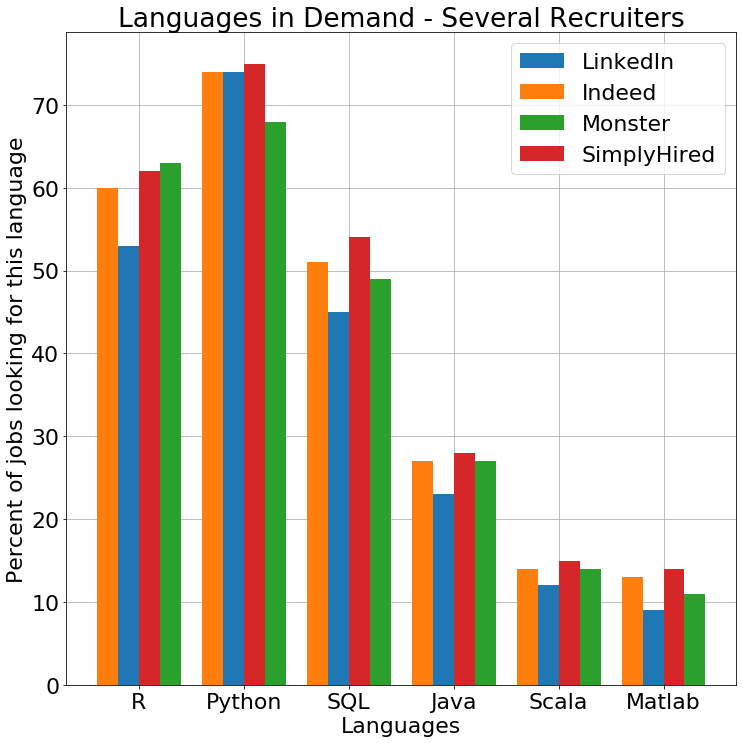

In [18]:
fig,ax031 = plt.subplots(figsize=(12, 12))
plt.rcParams.update({'font.size': 22})
width = .2
x = np.arange(len(langs_lables))
ax031.grid(b=True, axis='both')
ax031.set_axisbelow(True)
rects1 = ax031.bar(x - width/2, linked_langs, width, label='LinkedIn')
rects2 = ax031.bar(x - width*1.5, ind_langs, width, label='Indeed')
rects3 = ax031.bar(x + width*1.5, mons_langs, width, label='Monster')
rects4 = ax031.bar(x + width/2, simp_langs, width, label='SimplyHired')
ax031.set_title("Languages in Demand - Several Recruiters")
ax031.set_ylabel("Percent of jobs looking for this language")
ax031.set_xlabel("Languages")
ax031.legend()
ax031.set_xticks(x)
ax031.set_xticklabels(langs_lables)
fig.savefig('./Graphs/Langs_csv_03.png')

In [19]:
#on later thought, a loop that went through tools_labels, and built the lists programatically might have been faster.
tools_labels=['Spark','Azure','Hadoop','Hive','Pig','Tableau','SAS']
linked_tools = [linked_dict['Spark'],linked_dict['Azure'],linked_dict['Hadoop'],linked_dict['Hive'],linked_dict['Pig'],linked_dict['Tableau'],linked_dict['SAS']]
mons_tools = [mons_dict['Spark'],mons_dict['Azure'],mons_dict['Hadoop'],mons_dict['Hive'],mons_dict['Pig'],mons_dict['Tableau'],mons_dict['SAS']]
ind_tools = [ind_dict['Spark'],ind_dict['Azure'],ind_dict['Hadoop'],ind_dict['Hive'],ind_dict['Pig'],ind_dict['Tableau'],ind_dict['SAS']]
simp_tools = [simp_dict['Spark'],simp_dict['Azure'],simp_dict['Hadoop'],simp_dict['Hive'],simp_dict['Pig'],simp_dict['Tableau'],simp_dict['SAS']]

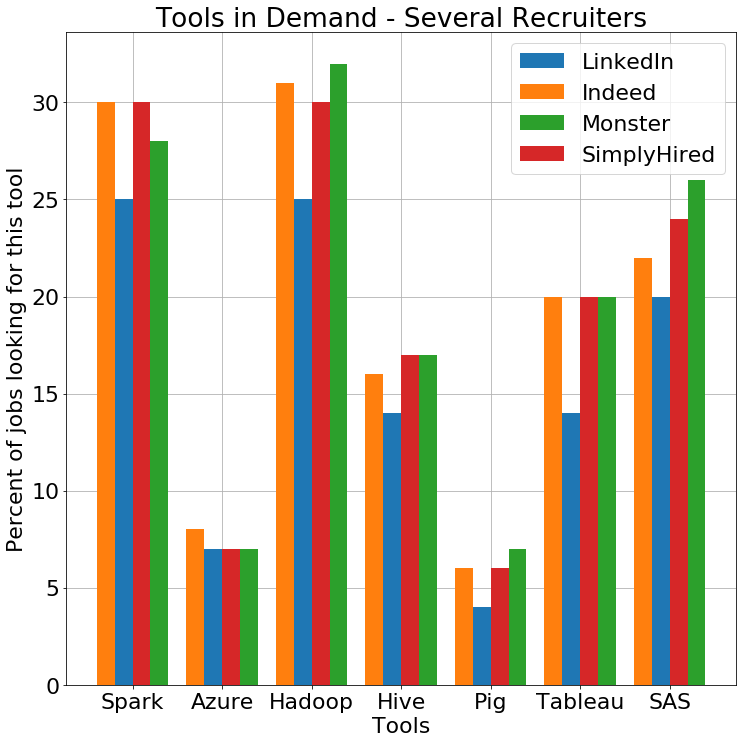

In [22]:
fig,ax032 = plt.subplots(figsize=(12, 12))
plt.rcParams.update({'font.size': 22})
width = .2
x = np.arange(len(tools_labels))
ax032.grid(b=True, axis='both')
ax032.set_axisbelow(True)
rects1 = ax032.bar(x - width/2, linked_tools, width, label='LinkedIn')
rects2 = ax032.bar(x - width*1.5, ind_tools, width, label='Indeed')
rects3 = ax032.bar(x + width*1.5, mons_tools, width, label='Monster')
rects4 = ax032.bar(x + width/2, simp_tools, width, label='SimplyHired')
ax032.set_title("Tools in Demand - Several Recruiters")
ax032.set_ylabel("Percent of jobs looking for this tool")
ax032.set_xlabel("Tools")
ax032.legend()
ax032.set_xticks(x)
ax032.set_xticklabels(tools_labels)
fig.savefig('./Graphs/tools_csv_03.png')